# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

In [39]:
%matplotlib inline


In [2]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2023-04-10 10:34:55--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  13.7MB/s    in 28s     

2023-04-10 10:35:23 (10.5 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2023-04-10 10:35:23--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K  --.-KB/s    in 0.05s   

2023-0

### Unzip it

In [3]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.jpg  
  inflating: Stanfo

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [93]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=12345, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['running_213.jpg', 'throwing_frisby_132.jpg', 'pouring_liquid_178.jpg', 'drinking_145.jpg', 'pouring_liquid_173.jpg', 'drinking_106.jpg', 'riding_a_bike_161.jpg', 'applauding_260.jpg', 'running_036.jpg', 'drinking_167.jpg', 'smoking_133.jpg', 'climbing_288.jpg', 'running_102.jpg', 'riding_a_horse_181.jpg', 'riding_a_horse_294.jpg', 'running_249.jpg', 'climbing_090.jpg', 'applauding_056.jpg', 'climbing_290.jpg', 'applauding_141.jpg', 'riding_a_horse_044.jpg', 'drinking_126.jpg', 'jumping_033.jpg', 'applauding_027.jpg', 'riding_a_bike_033.jpg', 'climbing_270.jpg', 'pouring_liquid_169.jpg', 'throwing_frisby_183.jpg', 'smoking_110.jpg', 'shooting_an_arrow_052.jpg', 'climbing_245.jpg', 'riding_a_horse_130.jpg', 'climbing_201.jpg', 'shooting_an_arrow_110.jpg', 'throwing_frisby_161.jpg', 'climbing_013.jpg', 'riding_a_bike_282.jpg', 'shooting_an_arrow_124.jpg', 'drinking_192.jpg', 'shooting_an_arrow_158.jpg', 'drinking_220.jpg', 'jumping_156.jpg', 'riding_a_horse_145.jpg'

### Visualize a photo from the training files and also print its label

An image with the label - riding_a_bike


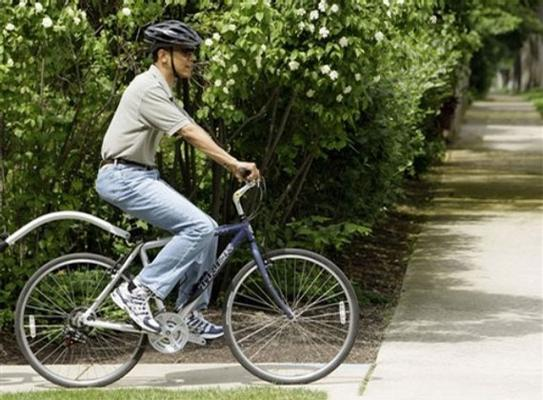

In [94]:
import cv2
from google.colab.patches import cv2_imshow

image_no = 234  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
cv2_imshow(img)

### preprocessing data

In [110]:
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

num_classes = 12
img_path = 'Stanford40/JPEGImages/'
# preprocessing
def preprocessing(files):
    dataset = []
    for file in files:
        img = cv2.imread(img_path + file)
        # either 112 or 224 should work really well
        # img = cv2.resize(img, (112, 112), interpolation=cv2.INTER_AREA) 
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA) 
        img = img/255.0
        # img = img.astype('float32')/255.0
        dataset.append(np.array(img))
    dataset = np.array(dataset)
    return dataset

# use 10% of train files as validation set
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, 
                                          train_labels, 
                                          test_size=0.1,
                                          stratify= train_labels)
                                      

train_dataset = preprocessing(train_files)
test_dataset = preprocessing(test_files)
validation_dataset = preprocessing(validation_files)





### common Data Augmentation

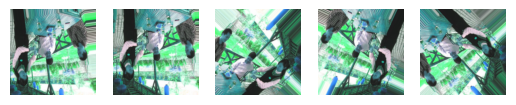

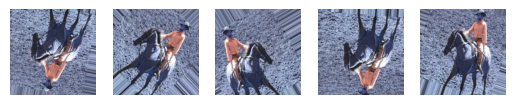

In [108]:
# # Data Augmentation
# from keras.preprocessing.image import ImageDataGenerator
# data_augmentor = ImageDataGenerator(
#         # featurewise_center=False,  # set input mean to 0 over the dataset
#         # samplewise_center=False,  # set each sample mean to 0
#         # featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         # samplewise_std_normalization=False,  # divide each input by its std
#         # zca_whitening=False,  # dimesion reduction
#         rotation_range=50,  # randomly rotate images in the range
#         # zoom_range = 0.1, # Randomly zoom image
#         width_shift_range=0.1,  # randomly shift images horizontally
#         height_shift_range=0.1,  # randomly shift images vertically
#         horizontal_flip=0.1,  # randomly flip images
#         vertical_flip=0.2  # randomly flip images
#         )
  
# data_augmentor.fit(train_dataset.reshape(len(train_dataset), 224, 224, 3))


# train_augment = data_augmentor.flow(train_dataset.reshape(len(train_dataset), 224, 224, 3)[1:2], batch_size=1)
# # validation_augment = data_augmentor.flow(validation_dataset.reshape(len(validation_dataset), 224, 224, 3)[1:2], batch_size=1)

# # display
# for i in range(1, 6):
#     plt.subplot(1,5,i)
#     plt.imshow(train_augment.next().squeeze())
#     plt.axis('off')
# plt.show()

# # # display
# # for i in range(1, 6):
# #     plt.subplot(1,5,i)
# #     plt.imshow(validation_augment.next().squeeze())
# #     plt.axis('off')
# # plt.show()


### color-based data *augmentation*

(2213, 224, 224, 3)
Augmented batch:


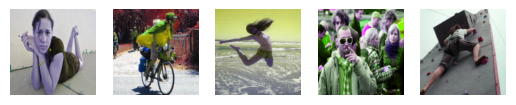

In [111]:
import random
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import imageio


ia.seed(1)

images = 255 * train_dataset # Now scale by 255
images = images.astype(np.uint8)
# print(type(images))
# print(images.dtype)
print(images.shape)


seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    # iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0

    # # Convert to HSV colorspace, add a value between 0 and 50 (uniformly sampled per image) to the Hue channel, then convert back to the input colorspace (RGB).
    iaa.WithColorspace(to_colorspace="HSV", 
                       from_colorspace="RGB", 
                       children=iaa.WithChannels(0, iaa.Add((0, 100))))                         
    
])


images_aug = seq(images=images)

# normalize back
train_dataset = images_aug.astype('float32')/255.0


print("Augmented batch:")
# for i in range(1, 5):
#     cv2_imshow(images_aug[5*i])

import matplotlib.pyplot as plt
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(images_aug[5*i])
    plt.axis('off')
plt.show()



In [97]:
# transform class label into number code
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
validation_labels = le.transform(validation_labels)
print("\n\n after label encoder:")
print("train labels: ", train_labels) # 2733 = 2459 + 274
print("validation labels: \n", len(validation_labels), validation_labels) # 274
print("test labels: ", test_labels) # 304

# if use categorical_crossentropy in compile(loss), one hot encoding is needed
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)
# validate_labels = to_categorical(validate_labels, num_classes)
print("\n\n after one hot encoding:")
print("train labels: \n", len(train_labels), train_labels)
print("validation labels: \n", len(validation_labels), validation_labels) 
print("test labels: \n", len( test_labels), test_labels)



 after label encoder:
train labels:  [ 9  4 10 ...  0  1  8]
validation labels: 
 274 [ 5  6 11  0  6  7  2  3 10  5  5  1  5  7  5  5  1  9  5  9  3  5  5 10
  4  0  4  3  0  0  9  6  9  5  9  2  3  2  3  3  7  0  1  7  3 11  3  8
  1  9  5  7  8  2  1  5  3  8  0  3  1  2  1 10  4  0 11 11  0 11  9 10
  2  6  2  6  5  1  4  6 11  7  6  8  3  6  9  9  7  6  1  7  5  0  1  8
  0 10  7 11 11  7  9  3  6  0  1  0 10  8  1  2  2  8  5  6  0  1  4 11
  1  7  1  1  0  0  3  1  1  7  2  6 11  4  5  7  6  8  8 10  4 10  4  8
 10  0  9  7  3  3  6  0  9  5  0  1  0  4  3  6 11 10  9  9  9  0  7  6
 10  0 11  3  5  0 11 11  1  2  9  6 11  7 10  6  3  1  2  5 10  8  6  3
  8  4  4  5  4  2  5  1  4  3  3  6  2  6  1  0  0  2  4  1  6  2  3  9
  8  4  8 10  5  7  7  4  7  9  1  8  8  2  6  9  2  3  7  6  4  4 11  6
  7  9  9  2 10  8  2  7  6 10  5  9  5  3  2 11  2 10  5  2 11  8  7  5
  0  3  1 11 10  6  3  0  1  8]
test labels:  [ 7  4  5  7  7  3  2  1  2  3 11  8 10  3  9  2  0  0 11  0  6

### VGG16

In [115]:
# from read_stanford40 import train_dataset, train_labels, \
#                             test_dataset, test_labels, \
#                             validation_dataset, validation_labels, \
#                             num_classes, keep_stanford40
import tensorflow as tf
from keras.applications import vgg16
from keras.applications import ResNet50
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, \
                         Flatten, Dense, GlobalAveragePooling2D
from keras.utils.layer_utils import count_params

# optimizers
from tensorflow.python.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam

import numpy as np
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

num_classes = 12

def define_model():
    
    # # ResNet50
    resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
    model = Sequential()
    model.add(resnet50)
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    
    return model
    


input_shape = (224, 224, 3)
model = define_model()

# print model structure and details
model.summary() 
model.summary(expand_nested=True)
print("model parameters (written in report table)")
model.count_params()
# plot the model
tf.keras.utils.plot_model(model, to_file='model.png')
tf.keras.utils.plot_model(model, show_shapes = True, to_file='model_shape.png')


# Compile
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# model.compile(optimizer=optimizer,
#           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#           metrics=['accuracy'])
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # For every 5 epoch, learning rate decreases to the 1/2 * previous learning rate
    if epoch % 5 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.5)
        print("lr changed to {}".format(lr * 0.5))
    return K.get_value(model.optimizer.lr)
 

reduce_lr = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)

# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])


# try early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(train_dataset, 
            train_labels, 
            validation_data=(validation_dataset, validation_labels), 
            epochs=70,
            callbacks=[es, reduce_lr])

model.save('Model/Stanford40_Frames.h5')






Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 12)                1204236   
                                                                 
Total params: 24,791,948
Trainable params: 24,738,828
Non-trainable params: 53,120
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_5 (Inpu

### save model to google drive

In [116]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# /content/drive/MyDrive/Colab_Models


Mounted at /content/drive


In [117]:
model.save('/content/drive/MyDrive/Colab_Models/Stanford40_Frames.h5')
model.save_weights("/content/drive/MyDrive/Colab_Models/Stanford40_Frames_weights.h5")

### evaluate test accuracy & loss

In [118]:
# evaluate test accuracy & loss
test_loss, test_acc = model.evaluate(test_dataset, test_labels, verbose=2)
print('Test Loss : {:.4f}'.format(test_loss))
print('Test Accuracy : {:.4f}'.format(test_acc))

10/10 - 0s - loss: 3.4525 - accuracy: 0.3717 - 235ms/epoch - 23ms/step
Test Loss : 3.4525
Test Accuracy : 0.3717


### Train Validation Acc & Loss

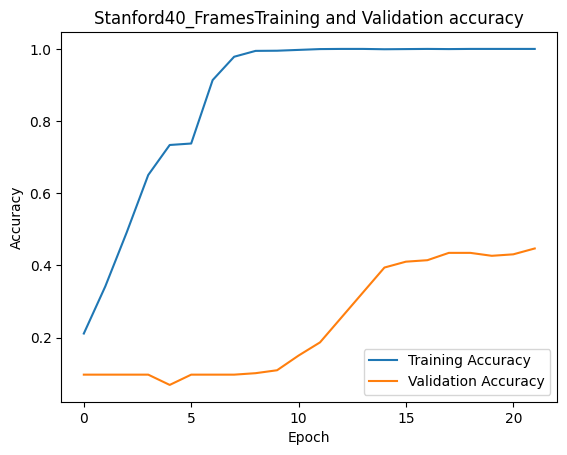

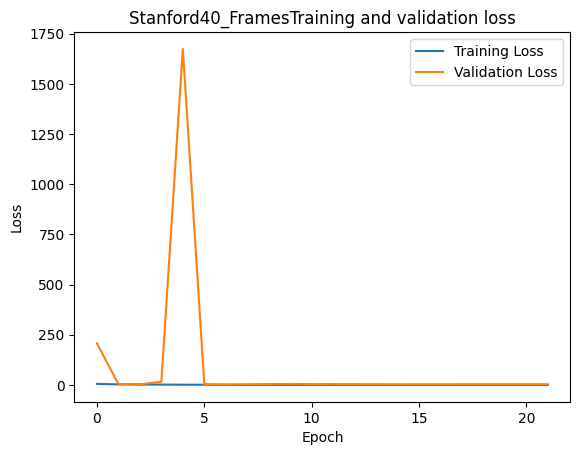

In [119]:

def plot_curves(history, model_name):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(model_name + 'Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(model_name + 'Training and validation loss')
    plt.legend()
    plt.show()



# plot training and validation accuracy, loss.
plot_curves(history=history, 
            model_name = "Stanford40_Frames")


### Confusion Matrix

10/10 [==============================] - 1s 18ms/step


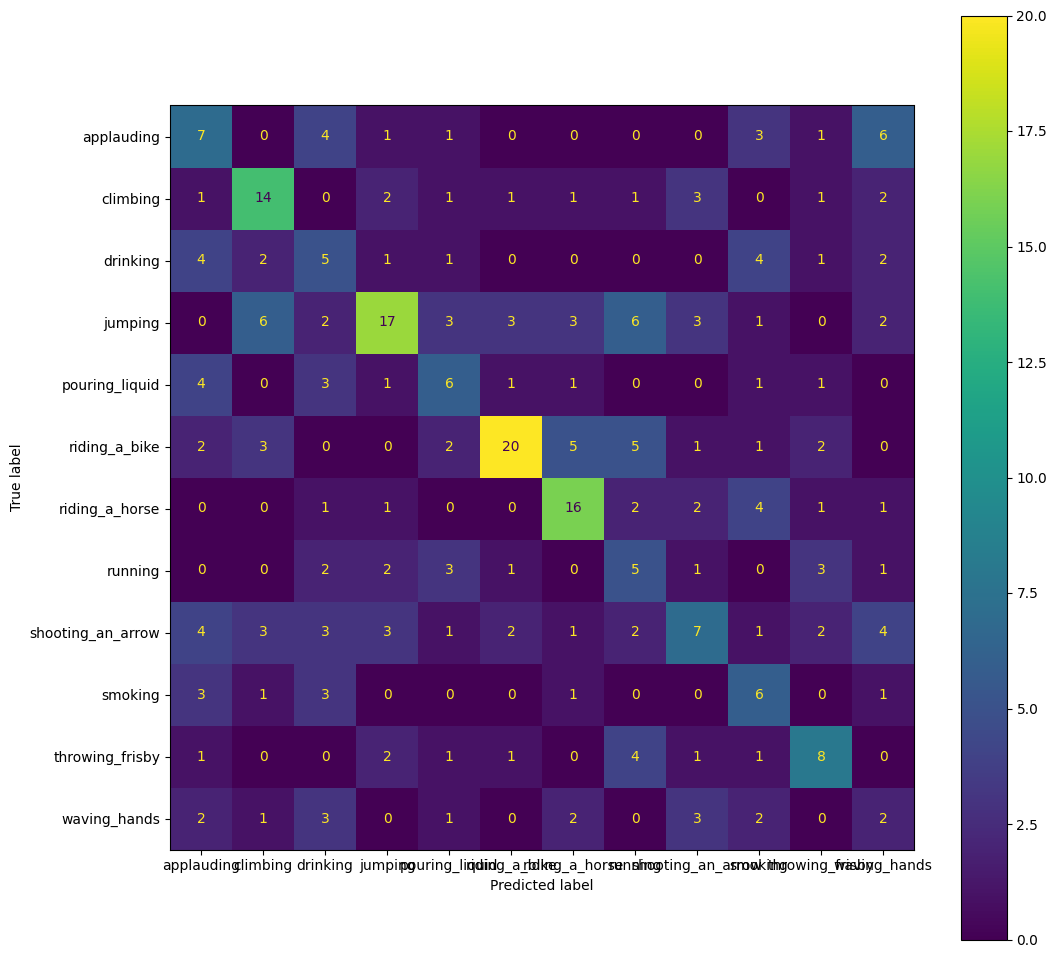

In [120]:

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#Make predictions
y_probs = model.predict(test_dataset)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
# # convert one hot encoded labels to single-digit ones
rounded_labels = np.argmax(test_labels, axis=1)
#Confusion matrix
cm=confusion_matrix(y_preds, rounded_labels)
# cm=confusion_matrix(y_preds, test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = keep_stanford40)
fig, ax = plt.subplots(figsize=(num_classes, num_classes))
disp.plot(ax=ax)
plt.show()
    


# Human Motion Database 51 (HMDB51)
### Download the dataset

In [121]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

--2023-04-10 13:27:41--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Resolving serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)... 128.148.254.114
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar [following]
--2023-04-10 13:27:42--  https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124008126 (2.0G)
Saving to: ‘hmdb51_org.rar.1’

hmdb51_org.rar.1    100%[===================>]   1.98G  40.3MB/s    in 50s     

2023-04-10 13:28:32 (40.2 MB/s) - ‘hmdb51_org.rar.1’ saved [2124008126/2124008126]

--2023-04-10 13:28:33--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.r

# Extract and organize the data.

In [122]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar 
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar



UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from test_train_splits.rar

Extracting  test_train_splits/brush_hair_test_split1.txt                   0%  OK 
Extracting  test_train_splits/brush_hair_test_split2.txt                   1%  OK 
Extracting  test_train_splits/brush_hair_test_split3.txt                   1%  OK 
Extracting  test_train_splits/cartwheel_test_split1.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split2.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split3.txt                    3%  OK 
Extracting  test_train_splits/catch_test_split1.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split2.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split3.txt                        5%  OK 
Extracting  test_train_splits/chew_test_split1.txt       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Split the dataset into train and test 

In [142]:
import glob
from collections import Counter
from sklearn.model_selection import train_test_split


TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
print(annotation_paths)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}') # 840 ['20060723sfjffangelina_run_f_nm_np1_ri_med_2.avi', ...
# 840 ['run', 'run', 'run', 'run', 'run', 'run' 
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}') # (360): 
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}') # (12):

['test_train_splits/golf_test_split1.txt', 'test_train_splits/sword_exercise_test_split1.txt', 'test_train_splits/catch_test_split1.txt', 'test_train_splits/run_test_split1.txt', 'test_train_splits/walk_test_split1.txt', 'test_train_splits/stand_test_split1.txt', 'test_train_splits/turn_test_split1.txt', 'test_train_splits/hit_test_split1.txt', 'test_train_splits/shoot_bow_test_split1.txt', 'test_train_splits/shake_hands_test_split1.txt', 'test_train_splits/climb_stairs_test_split1.txt', 'test_train_splits/kiss_test_split1.txt', 'test_train_splits/flic_flac_test_split1.txt', 'test_train_splits/ride_horse_test_split1.txt', 'test_train_splits/chew_test_split1.txt', 'test_train_splits/throw_test_split1.txt', 'test_train_splits/swing_baseball_test_split1.txt', 'test_train_splits/sit_test_split1.txt', 'test_train_splits/clap_test_split1.txt', 'test_train_splits/handstand_test_split1.txt', 'test_train_splits/shoot_ball_test_split1.txt', 'test_train_splits/situp_test_split1.txt', 'test_train_

## get mid frames

In [143]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
               "run", "shoot_bow", "smoke", "throw", "wave"]
resize_size = (224, 224)

def extract_middle_frame(video_path):
    
    # Read the Video (Change the filename as per your file)
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    half_point = length//2 # Approximately half if number of frames are odd

    # Set the reader to the given frame number (half_point)
    cap.set(cv2.CAP_PROP_POS_FRAMES, half_point)

    # Read the frame
    ret, frame = cap.read()
    frame = cv2.resize(frame, (224, 224))
    return frame

    # Release the file pointer
    cap.release()

def get_midFrames(train_files, test_files, train_labels, test_labels):


    # # 必须用 os.path.join来避免字符转义
    # hmdb51_video_folder = "/content/video_data"
    # for class_name in keep_hmdb51:
    #     class_folder = os.path.join(hmdb51_video_folder, class_name)
    #     print("class folder: ", class_folder) # /content/video_data/throw
    #     videos = os.listdir(class_folder) 
    #     print("videos:", videos) # video file names list
    #     for video in videos:
    #         video_path = os.path.join(class_folder, video)
    #         print("video_path: ", video_path) #  /content/video_data/clap/slowclap_clap_u_nm_np1_fr_goo_0.avi
    #         mid_frame = extract_middle_frame(video_path)
    #         # print("mid_frame shape: ", mid_frame.shape)


    train_dataset =  []
    test_dataset = []

    # video_path = r"/content/video_data/throw/20060723sfjffangelina_throw_u_cm_np1_ba_med_4.avi"
    # train_middle_frame = extract_middle_frame(video_path)
    # train_dataset.append(train_middle_frame)

    hmdb51_video_folder = "/content/video_data"
    print("Train_files: ")
    # print(train_labels)
    for i, video_path in enumerate(train_files):
        # print("video path: ", video_path)
        # print(train_labels[i])
        train_full_video_path = os.path.join(hmdb51_video_folder, train_labels[i], video_path)  
        # print("full video path", full_video_path) # /content/video_data/run/20060723sfjffangelina_run_f_nm_np1_ri_med_2.avi
        train_middle_frame = extract_middle_frame(train_full_video_path)
    #   print(train_middle_frame)
        train_dataset.append(train_middle_frame)
    print("Test_files: ")   
    for i, video_path in enumerate(test_files):
        test_full_video_path = os.path.join(hmdb51_video_folder, test_labels[i], video_path)  
        test_middle_frame = extract_middle_frame(test_full_video_path)
        test_dataset.append(test_middle_frame)

    
    return train_dataset, test_dataset

print(train_files)
# extract mid frames from videos
train_dataset, test_dataset = get_midFrames(train_files, test_files, train_labels, test_labels)


# use 10% of train files as validation set
train_dataset, validation_dataset, train_labels, validation_labels = train_test_split(train_dataset, 
                                                                                      train_labels, 
                                                                                      test_size=0.1,
                                                                                      random_state=42)






['20060723sfjffangelina_run_f_nm_np1_ri_med_2.avi', '20060723sfjffjewcy_run_f_nm_np1_ba_med_3.avi', '20060723sfjffsomelikeitwarmed_run_f_nm_np1_fr_med_6.avi', '50_FIRST_DATES_run_f_cm_np1_ba_med_12.avi', '50_FIRST_DATES_run_f_cm_np1_ri_med_21.avi', 'APOCALYPTO_run_u_nm_np1_fr_med_3.avi', 'A_Beautiful_Mind_4_run_f_cm_np1_ba_med_9.avi', 'A_Beautiful_Mind_5_run_u_cm_np1_fr_med_7.avi', 'AmericanGangster_run_f_cm_np1_le_med_18.avi', 'AmericanGangster_run_u_cm_np1_ri_med_65.avi', 'AmericanGangster_run_u_nm_np1_ba_med_66.avi', 'CastAway1_run_f_cm_np1_ri_med_2.avi', 'CharlieAndTheChocolateFactory_run_f_nm_np1_fr_bad_15.avi', 'CharlieAndTheChocolateFactory_run_f_nm_np1_le_bad_16.avi', 'Crash_run_f_cm_np1_fr_med_17.avi', 'Crash_run_l_cm_np1_fr_med_21.avi', 'EVOLUTION_run_f_nm_np2_fr_med_25.avi', 'Faith_Rewarded_run_f_cm_np1_le_med_16.avi', 'Fellowship_7_run_f_cm_np1_fr_med_4.avi', 'Fellowship_7_run_f_cm_np1_ri_med_15.avi', 'HP_PRISONER_OF_AZKABAN_run_f_cm_np1_ba_bad_36.avi', 'HP_PRISONER_OF_AZKA

In [136]:
print(type(train_dataset))
print(type(train_dataset[0]))
print(train_dataset[0].dtype)

<class 'list'>
<class 'numpy.ndarray'>
uint8


uint8
(756, 224, 224, 3)
Augmented batch:


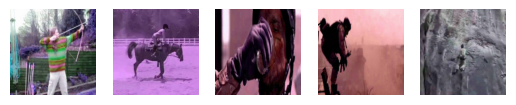

In [144]:
import random
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import imageio


ia.seed(1)

# images = 255 * train_dataset # Now scale by 255
# images = images.astype(np.uint8)
# print(type(images))
images = np.asarray(train_dataset)
print(images[0].dtype)
print(images.shape)



seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    # iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0

    # # Convert to HSV colorspace, add a value between 0 and 50 (uniformly sampled per image) to the Hue channel, then convert back to the input colorspace (RGB).
    iaa.WithColorspace(to_colorspace="HSV", 
                       from_colorspace="RGB", 
                       children=iaa.WithChannels(0, iaa.Add((0, 100))))                         
    
])


images_aug = seq(images=images)


print("Augmented batch:")
# for i in range(1, 5):
#     cv2_imshow(images_aug[5*i])

import matplotlib.pyplot as plt
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(images_aug[5*i])
    plt.axis('off')
plt.show()



### preprocessing

In [145]:
# preprocessing

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def pre_processing(files):
    dataset = []
    for img in files:
        img = img.astype('float32')/255.0
        dataset.append(np.array(img))
    dataset = np.array(dataset)
    return dataset

# Normalization
train_dataset = pre_processing(train_dataset)
test_dataset = pre_processing(test_dataset)
validation_dataset = pre_processing(validation_dataset)

# # Data Augmentation
# from keras.preprocessing.image import ImageDataGenerator
# data_augmentor = ImageDataGenerator(
#         # featurewise_center=False,  # set input mean to 0 over the dataset
#         # samplewise_center=False,  # set each sample mean to 0
#         # featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         # samplewise_std_normalization=False,  # divide each input by its std
#         # zca_whitening=False,  # dimesion reduction
#         # rotation_range=50,  # randomly rotate images in the range
#         # zoom_range = 0.1, # Randomly zoom image
#         # width_shift_range=0.1,  # randomly shift images horizontally
#         # height_shift_range=0.1,  # randomly shift images vertically
#         # horizontal_flip=0.1,  # randomly flip images
#         # vertical_flip=0.2  # randomly flip images
#         )
  
# data_augmentor.fit(train_dataset.reshape(len(train_dataset), 224, 224, 3))


# augment = data_augmentor.flow(train_dataset.reshape(len(train_dataset), 224, 224, 3)[1:2], batch_size=1)

# # display
# for i in range(1, 6):
#     plt.subplot(1,5,i)
#     plt.imshow(augment.next().squeeze())
#     plt.axis('off')
# plt.show()


In [146]:
num_classes = 12

# transform class label into number code
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
validation_labels = le.transform(validation_labels)

print("\n\n after label encoder:")
print("train labels: ", train_labels) 
print("test labels: ", test_labels) 
print("validation labels: \n", len(validation_labels), validation_labels) 


# if use categorical_crossentropy in compile(loss), one hot encoding is needed
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)
# validate_labels = to_categorical(validate_labels, num_classes)
print("\n\n after one hot encoding:")
print("train labels: \n", len(train_labels), train_labels)
print("validation labels: \n", len(validation_labels), validation_labels) 
print("test labels: \n", len( test_labels), test_labels)



 after label encoder:
train labels:  [ 2 11  2  2  8  8  8  1  4  3  6  5 11  0  5  2 11 10  0  5  3 11  7  7
  5  1  9  1  8  5  8  2  3  5  2  1  2  2  8  7  6  8  0  4 10 11  0  8
  4  5  7  0  9  3  0  8  9  2  4  6 11  0  3  2  9 10 10 11  7  5  0  8
  0  9  2  2  7  6  1  2  3 10 11  5  4  0  9  2  2  0  1  8  6  5  1  5
  3  9  0  1  8  3 10  4  7  4  3  4  1  3  1 11 10  3  1  7  6  1  2  1
  5  4  3  9 10  9  5 11  8  5  6  2 11  4  6  7  0  8  7  3  8  2  3  3
 10  8  8  6  6  7  2  6 10  4  5  8  3  0  6  4  7  4  1 10  1  8  1 11
  9  6  2 10 10  0  0  8  9  5  2  7 11  8  9  7  9  2  5  7  0  9  9  7
  9  5 10 11  1  2  1  7  1  0  8  7  4  0  0  9  5  6  0  4 10  4  4  0
  9  2  4  6  1 11  6 10  4 11  8  4  4  8  8  9  8  2  8  2  5  5  4  4
  8  7  4  7  7  6 11  3 11 11  6  4  3  6  3  1 10  9  0 11  7  7  9 10
  9  1  3  5  2 11  2  0  2  7 10  7  9 10  1 11  5  2  0 11  6 10  8  2
  9  4  0  6  3  3  6  8  3  4 10  7  4  6 10  1  4 10  8 11  8  8  3  0
 10  7  5  9

## HDMB51 transfer learning using Stanford40_Frames.h5 weights

In [147]:
from keras.saving.legacy.saving_utils import model_metadata
# import read_stanford_40 
# from midframe import train_data, train_labels, test_data, test_labels

import os
import glob
# data
from sklearn.model_selection import train_test_split

# tensorflow keras
import tensorflow as tf
from keras.applications import vgg16
from keras.applications import ResNet50
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, \
                         Flatten, Dense, GlobalAveragePooling2D
from keras.utils.layer_utils import count_params
from keras.utils import to_categorical

# optimizers
from tensorflow.python.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam

import cv2
import numpy as np
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

num_classes = 12


pretrained_model_path = "Model/Stanford40_Frames.h5"
# pretrained_model_path = "Model/Stanford40_Frames_weights.h5"
pretrained_model = load_model(pretrained_model_path)

# transfer learning
def create_model(pretrained_model):

  output_layer = Dense(num_classes, activation='softmax')(pretrained_model.layers[-2].output)
  pretrained_model = Model(inputs=pretrained_model.input, 
                           outputs=output_layer)

  return pretrained_model

# input_shape = (224, 224, 3)

model = create_model(pretrained_model)
model.summary()

# plot the model
tf.keras.utils.plot_model(model, to_file='HMDB51_frames_model.png')
tf.keras.utils.plot_model(model, show_shapes = True, to_file='HMDB51_frames_model_shape.png')

# Compile
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
# def scheduler(epoch):
#     # For every 5 epoch, learning rate decreases to the 1/2 * previous learning rate
#     if epoch % 5 == 0 and epoch != 0:
#         lr = K.get_value(model.optimizer.lr)
#         K.set_value(model.optimizer.lr, lr * 0.5)
#         print("lr changed to {}".format(lr * 0.5))
#     return K.get_value(model.optimizer.lr)
 

# reduce_lr = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)

# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )
# model.compile(optimizer='adam',
#         loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#         metrics=['accuracy'])
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])



# try early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(train_dataset, 
                    train_labels, 
                    validation_data=(validation_dataset, validation_labels),
                    # callbacks=[es, reduce_lr],  
                    callbacks=[es],  
                    epochs=50)
model.save('Model/HMDB51_Frames.h5')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 12)                1204236   
                                                                 
Total params: 24,791,948
Trainable params: 24,738,828
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 10s 178ms/step - loss: 2.0873 - accuracy: 0.3333 - val_loss: 2.0434 - val_accuracy: 0.4048
Epoch 2/50
24/24 [==============================] - 1s 60ms/step - loss: 0.4034 - accuracy: 0.9101 - val_loss: 2.0567 - val_accuracy: 0.4405
Epoch 3/50
24/24 [==============================] - 1s 60ms/step - loss: 0.1531 - accuracy: 0.9788 - val_loss: 1.9713 - val_accuracy: 0.4643
Epoch 4/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0946 - accuracy: 0.9907 - val_loss: 1.8491 - val_accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0565 - accuracy: 0.9974 - val_loss: 1.8940 - val_accuracy: 0.4405
Epoch 6/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0481 - accuracy: 0.9987 - val_loss: 1.8166 - val_accuracy: 0.4881
Epoch 7/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0335 - accuracy: 0.9987 - val_loss: 1.7401 - val_accuracy: 0.5000
Epoch 8/50
24/24 [====

### evaluate test accuracy & loss

In [149]:
# evaluate test accuracy & loss
test_loss, test_acc = model.evaluate(test_dataset, test_labels, verbose=2)
print('Test Loss : {:.4f}'.format(test_loss))
print('Test Accuracy : {:.4f}'.format(test_acc))

12/12 - 0s - loss: 2.6894 - accuracy: 0.2694 - 265ms/epoch - 22ms/step
Test Loss : 2.6894
Test Accuracy : 0.2694


### download models

In [151]:
model.save('/content/drive/MyDrive/Colab_Models/HMDB51_Frames.h5')
model.save_weights("/content/drive/MyDrive/Colab_Models/HMDB51_Frames_weights.h5")

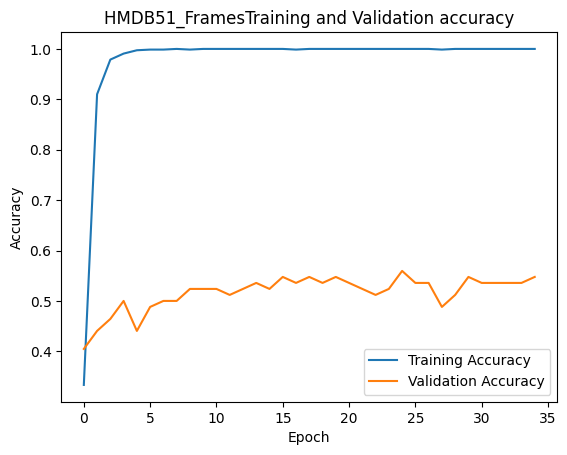

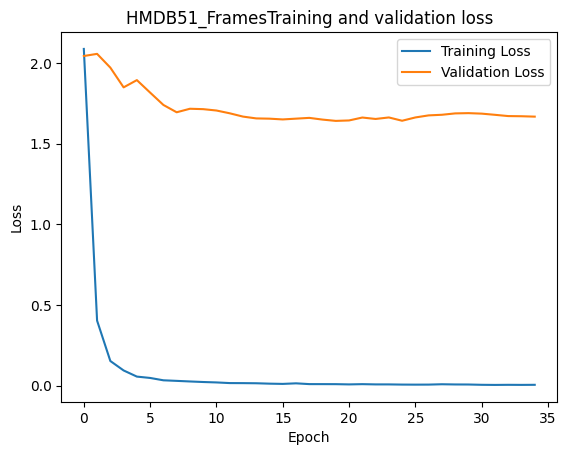

In [153]:

def plot_curves(history, model_name):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(model_name + 'Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(model_name + 'Training and validation loss')
    plt.legend()
    plt.show()



# plot training and validation accuracy, loss.
plot_curves(history=history, 
            model_name = "HMDB51_Frames")

12/12 [==============================] - 1s 18ms/step


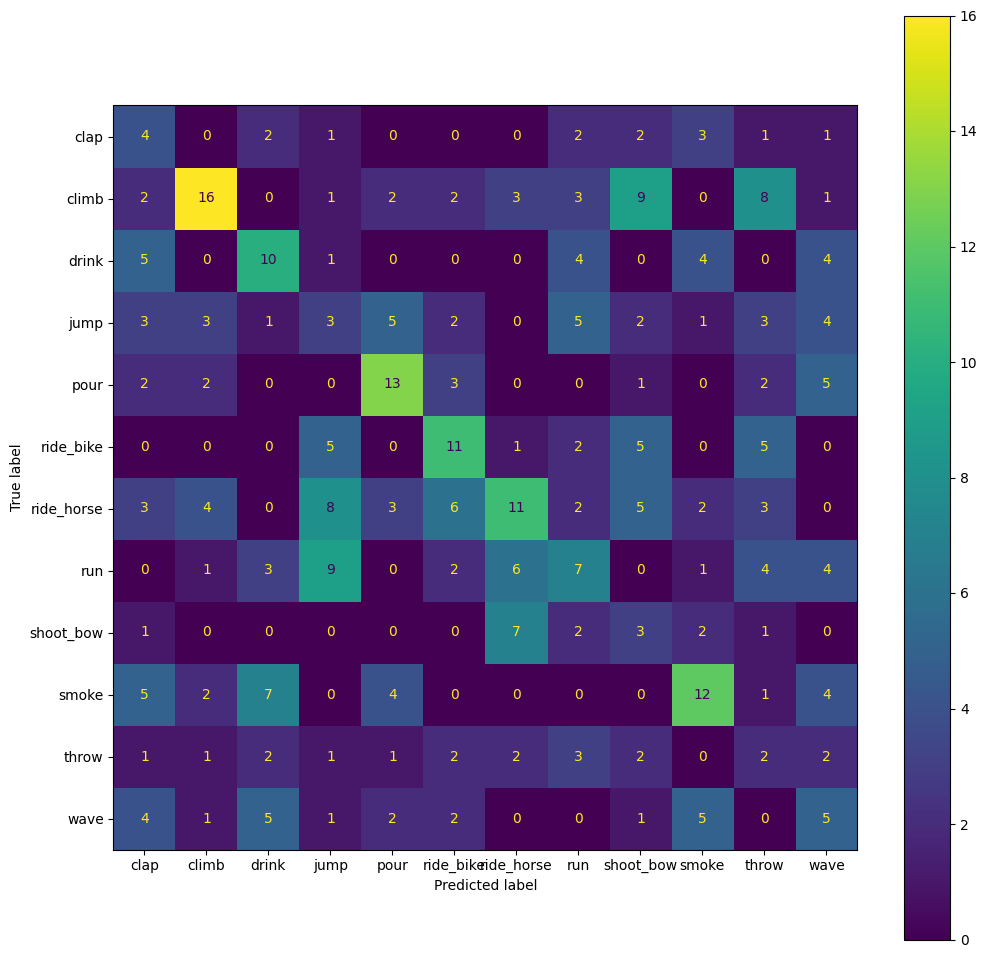

In [154]:

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#Make predictions
y_probs = model.predict(test_dataset)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
# # convert one hot encoded labels to single-digit ones
rounded_labels = np.argmax(test_labels, axis=1)
#Confusion matrix
cm=confusion_matrix(y_preds, rounded_labels)
# cm=confusion_matrix(y_preds, test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = keep_hmdb51)
fig, ax = plt.subplots(figsize=(num_classes, num_classes))
disp.plot(ax=ax)
plt.show()
    
